# L6 Intro and KNN

## 1. Randomly seperating training and test data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('person.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.9

dfTrain = df[msk].drop(columns=['Unnamed: 10', 'split'])
dfTest = df[~msk].drop(columns=['Unnamed: 10', 'split'])

dfTrain

,Adult,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,<=50K
0,Adult,Private,HS-grad,Married-civ-spouse,Other-service,Husband,Black,Male,United-States,<=50K
1,College Age,Private,Some High School,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
2,Adult,Federal-gov,Bachelors,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
3,Adult,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
4,Adult,Private,Some-college,Divorced,Craft-repair,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
30156,College Age,State-gov,Some-college,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
30157,Young Adult,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,United-States,<=50K
30158,Adult,Private,Some-college,Separated,Transport-moving,Not-in-family,White,Male,United-States,<=50K
30159,Adult,Local-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K


### Test Data

In [2]:
dfTest

,Adult,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,<=50K
22,College Age,Private,HS-grad,Never-married,Adm-clerical,Unmarried,White,Female,United-States,<=50K
54,Adult,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K
58,Adult,Self-emp-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
110,Adult,Local-gov,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,>50K
116,Adult,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...
30107,Adult,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
30108,Young Adult,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,United-States,<=50K
30127,Young Adult,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
30132,Adult,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Female,United-States,<=50K


## 2. K Nearest Neighbors

### OneHotEncode Data

In [4]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded = ohe.fit(dfTrain)
encodedTrain = encoded.transform(dfTrain).toarray()
encodedTest = encoded.transform(dfTest).toarray()

X_train = encodedTrain[:, 0:98]
X_test = encodedTest[:,0:98]
X_test

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [5]:
y_train = encodedTrain[:, 99]
y_test = encodedTest[:,99]

y_test

array([0., 0., 0., ..., 0., 0., 1.])

### Training KNN Classifiers

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score


clf = KNeighborsClassifier(n_neighbors=3) # n_neighbors=5
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print()
y_pred_knn_3 = y_pred
confusion_matrix(y_test, y_pred_knn_3)

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8084127505750903
Precision: 0.6158940397350994
Recall: 0.5145228215767634
F1 score: 0.5606631499623209



array([[2088,  232],
       [ 351,  372]])

In [6]:
clf = KNeighborsClassifier(n_neighbors=5) # n_neighbors=3
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print()
y_pred_knn_5 = y_pred
confusion_matrix(y_test, y_pred_knn_5)


clf = KNeighborsClassifier(n_neighbors=10) # n_neighbors=10
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print()
y_pred_knn_10 = y_pred
confusion_matrix(y_test, y_pred_knn_10)


clf = KNeighborsClassifier(n_neighbors=20) # n_neighbors=20
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print()

y_pred_knn_20 = y_pred

confusion_matrix(y_test, y_pred_knn_20)

Predicted: [0. 1. 0. ... 0. 0. 0.]
Accuracy: 0.8166275561515253
Precision: 0.6576433121019108
Recall: 0.5543624161073826
F1 score: 0.6016023306627822

Predicted: [0. 1. 0. ... 0. 0. 0.]
Accuracy: 0.8196446530338586
Precision: 0.7033398821218074
Recall: 0.48053691275167787
F1 score: 0.5709728867623604

Predicted: [0. 1. 0. ... 0. 0. 0.]
Accuracy: 0.8337244384847469
Precision: 0.7120954003407155
Recall: 0.5610738255033557
F1 score: 0.6276276276276276



array([[2069,  169],
       [ 327,  418]])

# L7 Decision Trees

Scikit-learn implementation does not support categorical variables for now.

## 1. ID3: based on Information Gain

In [7]:
from sklearn import tree
import graphviz

# "entropy" for the information gain
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
y_pred_id3 = y_pred

Predicted: [0. 1. 0. ... 0. 0. 0.]
Accuracy: 0.8246731478377473
Precision: 0.6646884272997032
Recall: 0.6013422818791946
F1 score: 0.631430584918957


## 2. CART: based on Gini (as default)

In [9]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_cart = y_pred

Predicted: [0. 1. 0. ... 0. 0. 0.]
Accuracy: 0.8226617499161918
Precision: 0.6641337386018237
Recall: 0.5865771812080537
F1 score: 0.6229508196721312


# L8 Naive Bayes

In [13]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_bayes = y_pred

Predicted: [0. 1. 1. ... 0. 0. 0.]
Accuracy: 0.7603084143479718
Precision: 0.5130434782608696
Recall: 0.7919463087248322
F1 score: 0.6226912928759895


# L9 SVM and Kernels

## 1. Support Vector Classification

### Linear SVM

When C=1.0 as default:

In [14]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_svm_1 = y_pred

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8360710693932283
Precision: 0.7077922077922078
Recall: 0.5852348993288591
F1 score: 0.6407053637031594


When C=0.1, allowing more errors:

In [15]:
clf = LinearSVC(C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_svm_01 = y_pred

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8343949044585988
Precision: 0.7047308319738989
Recall: 0.5798657718120805
F1 score: 0.6362297496318114


When C=0.01, allowing many errors:

In [16]:
clf = LinearSVC(C=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_svm_001 = y_pred

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8327187395239691
Precision: 0.705685618729097
Recall: 0.5664429530201343
F1 score: 0.6284437825763217


### Kernel SVM

When kernel='rbf' (Radius Basis Function: Gaussian):

In [17]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_kernel_rbf = y_pred

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8350653704324505
Precision: 0.707037643207856
Recall: 0.5798657718120805
F1 score: 0.6371681415929203


When kernel is Quadratic kernel ("Degree-2 polynomial kernel"):

In [18]:
clf = SVC(kernel='poly', degree=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted:", y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

y_pred_kernel_quad = y_pred

Predicted: [0. 0. 0. ... 0. 0. 0.]
Accuracy: 0.8340596714716728
Precision: 0.7035830618892508
Recall: 0.5798657718120805
F1 score: 0.6357615894039734


## ROC curve

In [22]:
from itertools import cycle

n_methods = 5
methods = ["KNN-20", "CART", "ID3", "Naive Bayes", "Linear SVM", "Kernel SVM (Quadradic)"]
colors = cycle(['red', 'navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

In [23]:
from sklearn.metrics import roc_curve

fpr = dict()
tpr = dict()

fpr[0], tpr[0], _ = roc_curve(y_test, y_pred_knn_20)
fpr[1], tpr[1], _ = roc_curve(y_test, y_pred_cart)
fpr[2], tpr[2], _ = roc_curve(y_test, y_pred_id3)
fpr[3], tpr[3], _ = roc_curve(y_test, y_pred_bayes)
fpr[4], tpr[4], _ = roc_curve(y_test, y_pred_svm_1)
fpr[5], tpr[5], _ = roc_curve(y_test, y_pred_kernel_quad)

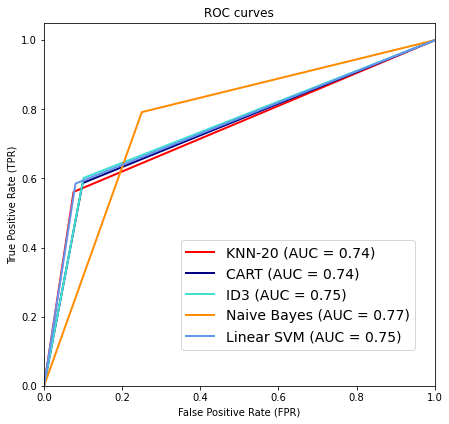

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

plt.figure(figsize=(7, 8))
lines = []
labels = []

for i, color in zip(range(n_methods), colors):
    l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
    lines.append(l)
    labels.append('{0} (AUC = {1:0.2f})'.format(methods[i], auc(fpr[i], tpr[i])))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curves')
plt.legend(lines, labels, loc=(.35, .1), prop=dict(size=14))

plt.show()

## 3. Precision-Recall curve

In [25]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()

precision[0], recall[0], _ = precision_recall_curve(y_test, y_pred_knn_20)
precision[1], recall[1], _ = precision_recall_curve(y_test, y_pred_cart)
precision[2], recall[2], _ = precision_recall_curve(y_test, y_pred_id3)
precision[3], recall[3], _ = precision_recall_curve(y_test, y_pred_bayes)
precision[4], recall[4], _ = precision_recall_curve(y_test, y_pred_svm_1)
precision[5], recall[5], _ = precision_recall_curve(y_test, y_pred_kernel_quad)

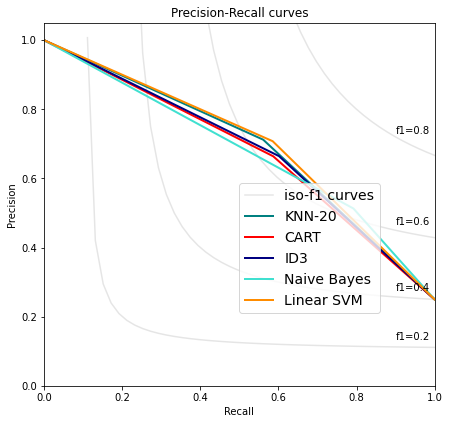

In [26]:
plt.figure(figsize=(7, 8))
lines = []
labels = []

f_scores = np.linspace(0.2, 0.8, num=4)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')

for i, color in zip(range(n_methods), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append(methods[i])

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(lines, labels, loc=(.5, .2), prop=dict(size=14))

plt.show()